**HYPOTHESIS PRIORITIZATION AND AB TEST RESULTS ANALYSIS TO INCREASE INTERNET STORE REVENUE**

**Data sources**
  - csv with the name of the hypotheses, assessment of coverage, impact, confidence in the result and costs on a 10-point scale - /datasets/hypothesis.csv
  - csv with data on orders in the online store, broken down by tested groups - /datasets/orders.csv
  - csv with data on the number of visits to the online store - /datasets/visitors.csv
 
**Target**
 
  - prioritization of hypotheses
  - analysis of A/B test results

## Prioritization of hypotheses

In [1]:
import pandas as pd
pd.set_option('display.max_colwidth', 100)
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import os

In [2]:
path1 = os.path.join('/datasets', 'hypothesis.csv')
path2 = os.path.join('hypothesis.csv')
if os.path.exists(path1):
    priority = pd.read_csv(path1)
    print(f'path "{path1}" is right')
elif os.path.exists(path2):
    priority = pd.read_csv(path2)
    print(f'path "{path2}" is right')
else:
    print('File is not found')

path "hypothesis.csv" is right


In [3]:
priority

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве...",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


**Conclusion**

We have 9 hypotheses related to the modification of the site interface, the development of own delivery service, attracting traffic through new channels and holding promotions

### ICE framework

In [4]:
priority['ICE'] = priority['Impact']*priority['Confidence']/priority['Efforts']

### RICE framework

In [5]:
priority['RICE'] = priority['Reach']*priority['Impact']*priority['Confidence']/priority['Efforts']

In [6]:
priority

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE,RICE
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333333,40.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000000,4.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...",8,3,7,3,7.000000,56.0
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125000,9.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000000,3.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333333,4.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве...",5,3,8,3,8.000000,40.0
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200000,112.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200000,16.2


### Analysis of results

In [7]:
ice = priority[['Hypothesis', 'ICE']].sort_values(by = 'ICE', ascending = False).reset_index()

In [8]:
rice = priority[['Hypothesis', 'RICE']].sort_values(by = 'RICE', ascending = False).reset_index()

In [9]:
ice.merge(rice, left_index=True, right_index=True, suffixes=('_ICE', '_RICE'))[['Hypothesis_ICE', 'Hypothesis_RICE']]

,Hypothesis_ICE,Hypothesis_RICE
0,"Запустить акцию, дающую скидку на товар в день рождения","Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок"
1,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей","Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни..."
2,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок","Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей"
3,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве...","Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве..."
4,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...","Запустить акцию, дающую скидку на товар в день рождения"
5,"Запустить собственную службу доставки, что сократит срок доставки заказов","Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар"
6,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов","Запустить собственную службу доставки, что сократит срок доставки заказов"
7,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар","Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов"
8,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей","Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей"


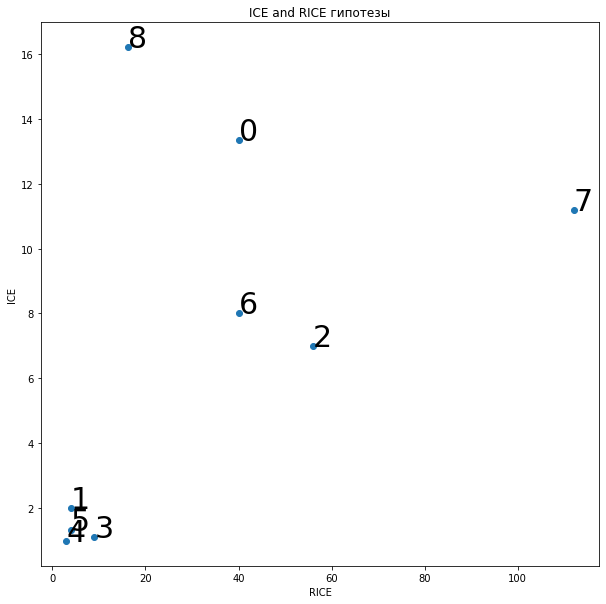

In [10]:
y = priority['ICE'] 
z = priority['RICE'] 
n = priority.index 

fig, ax = plt.subplots()
ax.scatter(z, y)

for i, txt in enumerate(n):
    ax.annotate(txt, (z[i], y[i]), size=30)

plt.title("ICE and RICE гипотезы") 
plt.xlabel("RICE") 
plt.ylabel("ICE")

fig.set_figheight(10)
fig.set_figwidth(10) 
plt.show()    

**Conclusion**

ICE and RICE give different results on hypothesis priority. Despite this, the top 3 hypotheses for both RICE and ICE include the hypothesis of attracting traffic through 2 new channels (3rd and 2nd places, respectively)
The difference is explained by the fact that RICE includes user coverage and prioritizes hypotheses, including taking into account their impact on a larger number of users.
Prioritization of hypotheses according to the RICE framework is the most complex and preferred

## A/B test analysis

### Data preprocessing

In [11]:
path1 = os.path.join('/','datasets', 'orders.csv')
path2 = os.path.join('orders.csv')
if os.path.exists(path1):
    orders = pd.read_csv(path1)
    print(f'path "{path1}" is right')
elif os.path.exists(path2):
    orders = pd.read_csv(path2)
    print(f'path "{path2}" is right')
else:
    print('File is not found')

path "orders.csv" is right


In [12]:
path1 = os.path.join('/','datasets', 'visitors.csv')
path2 = os.path.join('visitors.csv')
if os.path.exists(path1):
    visitors = pd.read_csv(path1)
    print(f'path "{path1}" is right')
elif os.path.exists(path2):
    visitors = pd.read_csv(path2)
    print(f'path "{path2}" is right')
else:
    print('File is not found')

path "visitors.csv" is right


In [13]:
def observe_data(table):
    '''Giving common understanding of data in dataframe'''
    print ('Sample')
    display(table.sample())
    print('_'*100)
    print(f'Rows number: {table.shape[0]} \Columns number: {table.shape[1]}')
    print('_'*100)
    names_columns = table.columns
    print(f'Columns names: {names_columns}')
    print('_'*100)
    lost_values = table.isna().sum()
    missed_values = lost_values.to_frame(name='missed_values')
    missed_values['percent'] = round(table.isna().mean()*100, 0)
    print ('Missing values:')
    display(missed_values)
    print('_'*100)
    print('Data types:')
    print(table.dtypes)
    print('_'*100)
    print(f'Number of duplicates: {table.duplicated().sum()}', 
          f'percent of duplicates {round(table.duplicated().mean()*100, 0)} %')

In [14]:
observe_data(orders)

Sample


,transactionId,visitorId,date,revenue,group
1161,2961555325,325179089,2019-08-14,1100,B


____________________________________________________________________________________________________
Rows number: 1197 \Columns number: 5
____________________________________________________________________________________________________
Columns names: Index(['transactionId', 'visitorId', 'date', 'revenue', 'group'], dtype='object')
____________________________________________________________________________________________________
Missing values:


,missed_values,percent
transactionId,0,0.0
visitorId,0,0.0
date,0,0.0
revenue,0,0.0
group,0,0.0


____________________________________________________________________________________________________
Data types:
transactionId     int64
visitorId         int64
date             object
revenue           int64
group            object
dtype: object
____________________________________________________________________________________________________
Number of duplicates: 0 percent of duplicates 0.0 %


In [15]:
observe_data(visitors)

Sample


,date,group,visitors
23,2019-08-24,A,395


____________________________________________________________________________________________________
Rows number: 62 \Columns number: 3
____________________________________________________________________________________________________
Columns names: Index(['date', 'group', 'visitors'], dtype='object')
____________________________________________________________________________________________________
Missing values:


,missed_values,percent
date,0,0.0
group,0,0.0
visitors,0,0.0


____________________________________________________________________________________________________
Data types:
date        object
group       object
visitors     int64
dtype: object
____________________________________________________________________________________________________
Number of duplicates: 0 percent of duplicates 0.0 %


**Correcting data type for date columns**

In [16]:
orders.date = pd.to_datetime(orders.date, format = "%Y-%m-%d")

In [17]:
visitors.date = pd.to_datetime(visitors.date, format = "%Y-%m-%d")

**Let's see if all customers who placed orders belong to the same group**

In [18]:
len(orders.groupby('visitorId', as_index = False)['group'].nunique().reset_index().query('group == 2'))

58

To obtain correct AB test results, a visitor who falls into one of the groups remains in this group until the end of the test. We have 58 clients belonging to two groups at once

In [19]:
visitors_to_delete = orders.groupby('visitorId')['group'].nunique().reset_index().query('group == 2')['visitorId']

In [20]:
orders = orders.query('visitorId not in @visitors_to_delete')

In [21]:
orders

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
...,...,...,...,...,...
1191,3592955527,608641596,2019-08-14,16490,B
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A


In [22]:
orders.group.nunique()

2

In [23]:
visitors.group.nunique()

2

In [24]:
orders.date.agg(['max', 'min'])

max   2019-08-31
min   2019-08-01
Name: date, dtype: datetime64[ns]

In [25]:
visitors.date.agg(['max', 'min'])

max   2019-08-31
min   2019-08-01
Name: date, dtype: datetime64[ns]

**Conclusion**

- no duplicates or gaps found in the data
- date columns converted to datetime type
- 58 customers were found who made orders and belonged to two groups at once, which is 5.8% of all customers who made purchases - these records were removed from the orders table

### Chart of cumulative revenue by groups

In [26]:
groupA_revenues = orders.query('group == "A"').groupby('date', as_index = False).agg({'revenue':'sum', 'transactionId':'count'})
groupB_revenues = orders.query('group == "B"').groupby('date', as_index = False).agg({'revenue':'sum', 'transactionId':'count'})
groupA_revenues['cumsum_revenue'] = np.cumsum(groupA_revenues['revenue'])
groupB_revenues['cumsum_revenue'] = np.cumsum(groupB_revenues['revenue'])

C:\Users\Utilisateur\anaconda3\envs\praktikum_env_win_new1\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


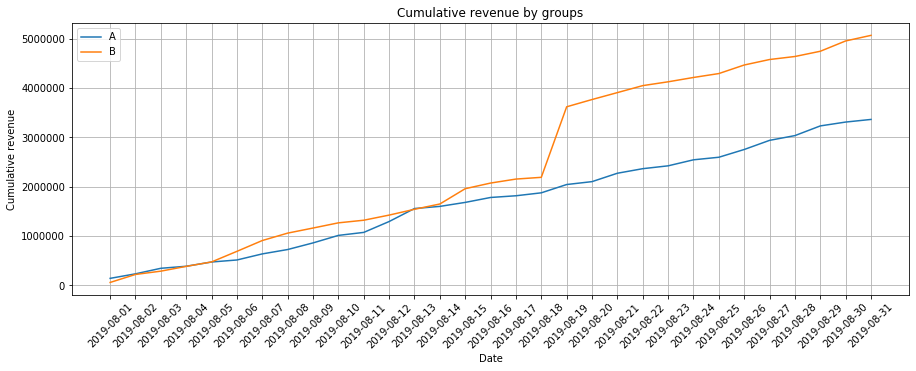

In [27]:
plt.figure(figsize=(15,5))
plt.xticks(rotation=45)
plt.plot(groupA_revenues['date'], groupA_revenues['cumsum_revenue'], label='A')
plt.plot(groupB_revenues['date'], groupB_revenues['cumsum_revenue'], label='B')
plt.grid()
plt.ylabel('Cumulative revenue')
plt.xlabel('Date')
plt.legend()
plt.title('Cumulative revenue by groups')
plt.xticks(ticks=groupB_revenues['date']);

**Conclusion**

Cumulative revenue is growing both for group A and for group
In group A, revenue grows gradually, without any unexpected bursts, however, its value always turns out to be lower than the revenue for group B
Group B is characterized by a sudden sharp increase in revenue from August 18 to 19, which may be due to abnormally expensive orders or an abnormally large number of purchases.
In general, so far we can say that in group B the situation with revenue is somewhat better than in group A.
The graph for the cleaned data will be shown later 

### Graph of the cumulative average check by groups

In [28]:
groupA_revenues['cumsum_number_checks'] = np.cumsum(groupA_revenues['transactionId'])
groupB_revenues['cumsum_number_checks'] = np.cumsum(groupB_revenues['transactionId'])

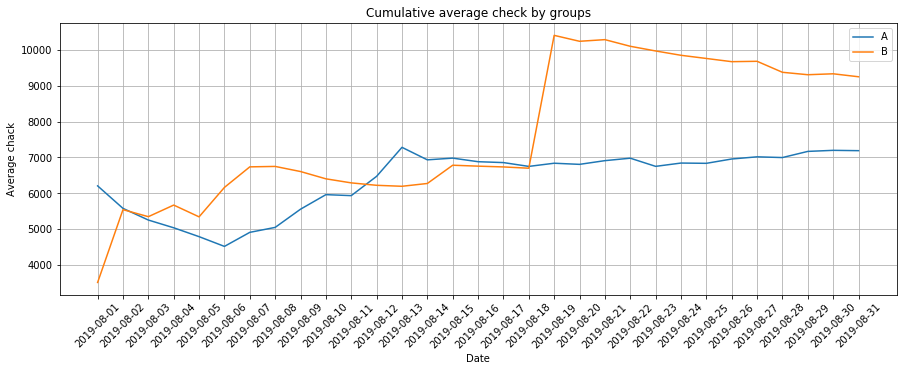

In [29]:
plt.figure(figsize=(15,5))
plt.xticks(rotation=45)
plt.plot(groupA_revenues['date'], groupA_revenues['cumsum_revenue']/groupA_revenues['cumsum_number_checks'], label='A')
plt.plot(groupB_revenues['date'], groupB_revenues['cumsum_revenue']/groupB_revenues['cumsum_number_checks'], label='B')
plt.legend()
plt.grid()
plt.ylabel('Average chack')
plt.xlabel('Date')
plt.legend()
plt.title('Cumulative average check by groups')
plt.xticks(ticks=groupB_revenues['date']);

In [30]:
orders.query('date == "2019-08-19" and group == "B"')

,transactionId,visitorId,date,revenue,group
315,1939633950,157579733,2019-08-19,2330,B
319,2414788465,2247745159,2019-08-19,1435,B
320,1652782757,2763027084,2019-08-19,1460,B
322,3154167297,2091902649,2019-08-19,250,B
363,2096847394,4251115836,2019-08-19,2500,B
367,1033377712,3860669668,2019-08-19,3990,B
368,3268879337,2536252163,2019-08-19,20026,B
423,4161654914,990904712,2019-08-19,11249,B
424,2609443403,2406916810,2019-08-19,470,B
425,590470918,1920142716,2019-08-19,1294500,B


**Conclusion**

For most of the testing period, the average cumulative check for group B was higher than for group A, but this is due to a sharp jump in the average check for group B from August 18 to 19. It can be explained by the abnormally expensive order(s) placed by Group B customers. Our assumptions were confirmed - one of the Group B customers placed an order worth more than 1 million rubles. In the future, we will clean the data from anomalies

### Graph of the relative change in the cumulative average check of group B to group A

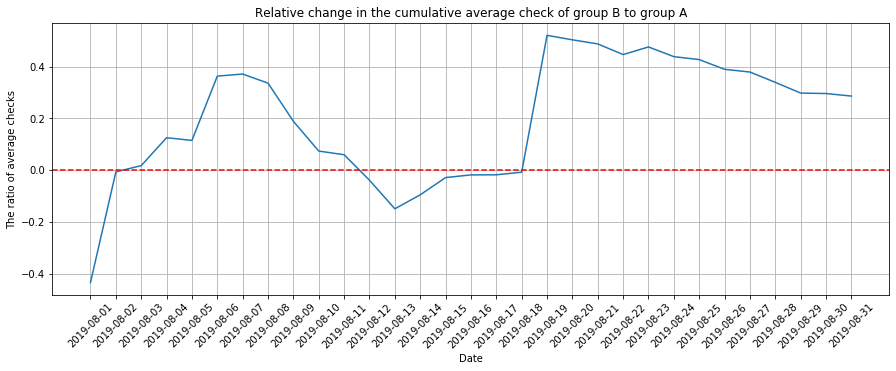

In [31]:
cum_check = groupA_revenues.merge(groupB_revenues, on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(15,5))
plt.xticks(rotation=45)
plt.plot(cum_check['date'], (cum_check['cumsum_revenueB']/cum_check['cumsum_number_checksB'])/(cum_check['cumsum_revenueA']/cum_check['cumsum_number_checksA'])-1)
plt.axhline(y=0, color='red', linestyle='--') 
plt.grid()
plt.ylabel('The ratio of average checks')
plt.xlabel('Date')
plt.title('Relative change in the cumulative average check of group B to group A')
plt.xticks(ticks=groupB_revenues['date']);


**Conclusion**

The graph does not show a definite trend - we cannot say that the average check of group B was always higher than the average check of group A or that it stabilized at the end of the experiment - the dates on which the clients of the groups made abnormally expensive orders are clearly visible on the graph

### Graph of cumulative conversion by groups

In [32]:
visitorsA = visitors.query('group == "A"')
visitorsB = visitors.query('group == "B"')
conversionA = groupA_revenues.merge(visitorsA, on = 'date')
conversionA['cumsum_visitors'] = np.cumsum(conversionA.visitors)
conversionA['cumsum_conversion'] = conversionA.cumsum_number_checks/conversionA.cumsum_visitors
conversionB = groupB_revenues.merge(visitorsB, on = 'date')
conversionB['cumsum_visitors'] = np.cumsum(conversionB.visitors)
conversionB['cumsum_conversion'] = conversionB.cumsum_number_checks/conversionB.cumsum_visitors

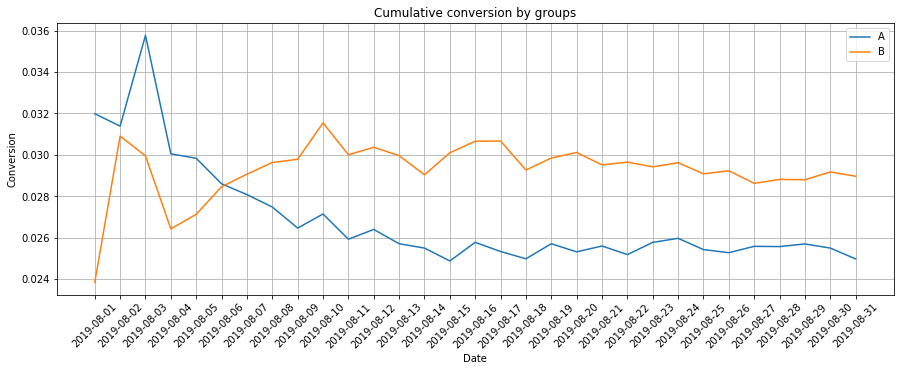

In [33]:
plt.figure(figsize=(15,5))
plt.xticks(rotation=45)
plt.plot(conversionA['date'], conversionA.cumsum_conversion, label='A')
plt.plot(conversionB['date'], conversionB.cumsum_conversion, label='B')
plt.legend()
plt.grid()
plt.ylabel('Conversion')
plt.xlabel('Date')
plt.title('Cumulative conversion by groups')
plt.xticks(ticks=groupB_revenues['date']);


**Conclusion**

At the beginning of the experiment, conversions fluctuate, but already from the middle it is clear that they become stable and the conversion of group B is higher than the conversion of group A

### Graph of the relative change in the cumulative conversion of group B to group A

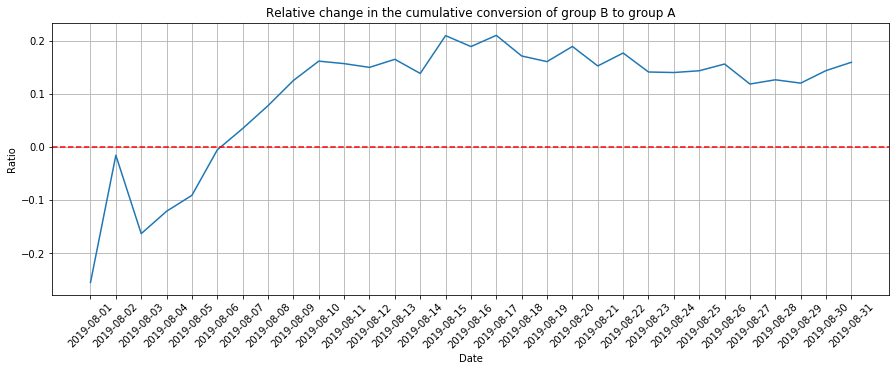

In [34]:
conversion = conversionA.merge(conversionB, on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize=(15,5))
plt.xticks(rotation=45)
plt.plot(conversion['date'], (conversion.cumsum_number_checksB/conversion.cumsum_visitorsB)/(conversion.cumsum_number_checksA/conversion.cumsum_visitorsA)-1)
plt.axhline(y=0, color='red', linestyle='--') 
plt.grid()
plt.ylabel('Ratio')
plt.xlabel('Date')
plt.title('Relative change in the cumulative conversion of group B to group A')
plt.xticks(ticks=groupB_revenues['date']);


**Conclusion**

The conversion ratio has been established and on average the conversion of group B is higher than the conversion of group A by 12-20%

### Scatter plot of the number of orders by users

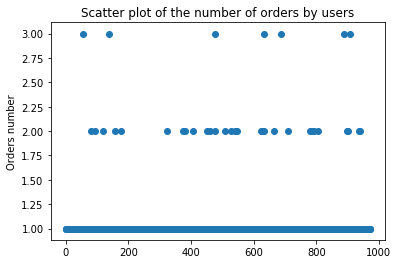

In [35]:
user_orders = orders.groupby('visitorId')['transactionId'].nunique().reset_index()
x_values = pd.Series(range(0,len(user_orders)))
plt.scatter(x_values, user_orders['transactionId'])
plt.ylabel('Orders number')
plt.title('Scatter plot of the number of orders by users'); 

**Conclusion**

We see that most customers make 1 order on the site during the test period - while there are users who made 2 and 3 orders - most likely these are anomalies

### 95th and 99th percentile orders per user

In [36]:
np.percentile(user_orders['transactionId'], [95, 99])

array([1., 2.])

**Conclusion**

Let's choose the border as an abnormal number of orders - 2, that is, when cleaning the data, we will delete users who have made more than one order - this way we will delete 1% of the available data

### Scatter plot of order values

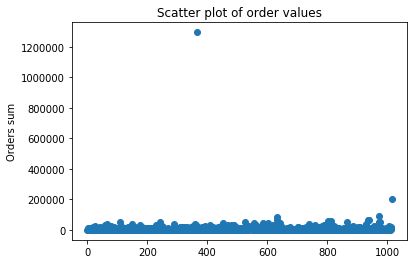

In [37]:
x_values = pd.Series(range(0,len(orders)))
plt.scatter(x_values, orders.revenue) 
plt.ylabel('Orders sum')
plt.title('Scatter plot of order values'); 

**Conclusion**

We clearly see at least 2 outliers - orders worth about 1.2 million and 200 thousand

### 95th and 99th order value percentiles

In [38]:
np.percentile(orders.revenue, [95, 99])

array([26785., 53904.])

**Conclusion**

Let's choose as abnormally expensive orders orders, the cost of which exceeds 53904 rubles - in this way we will delete another 1% of the data

### Statistical significance of differences in the number of orders between groups according to "raw" data

Null hypothesis H0: the average number of checks in group A is equal to the average number of checks in group B

Alternative hypothesis H1: the average number of checks in group A is not equal to the average number of checks in group B

Let's take alpha = 0.05

In [39]:
orders_usersA = orders.query('group == "A"').groupby('visitorId')['transactionId'].nunique().reset_index()

In [40]:
orders_usersB = orders.query('group == "B"').groupby('visitorId')['transactionId'].nunique().reset_index()

In [41]:
sampleA = pd.concat([orders_usersA['transactionId'],pd.Series(0, index=np.arange(visitors.query('group == "A"')['visitors'].sum() - len(orders_usersA)), name='orders')],axis=0)
sampleB = pd.concat([orders_usersB['transactionId'],pd.Series(0, index=np.arange(visitors.query('group == "B"')['visitors'].sum() - len(orders_usersB)), name='orders')],axis=0)

In [42]:
print('p_value = ', "{0:.5f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))
print('relative increase in the number of checks of group B in relation to group A =', "{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))
alpha = 0.05 
results = stats.mannwhitneyu(sampleA, sampleB)
if (results.pvalue < alpha):
    print("Rejecting H0")
else:
    print("Failed to reject H0")

p_value =  0.00551
relative increase in the number of checks of group B in relation to group A = 0.160
Rejecting H0


**Conclusion**

We confirmed the statistical significance of the difference between the average number of checks for groups - the number of orders in group B is 16% more than the same indicator for group A

### Statistical significance of differences in the average order receipt between groups according to "raw" data

Null hypothesis H0: the average check of group A is equal to the average check of group B

Alternative hypothesis H1: the average check of group A is not equal to the average check of group B

Let's take alpha = 0.05

In [43]:
print('pvalue = ',
      '{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('relative increase in the amount of checks of group B in relation to group A=', 
      '{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))
alpha = 0.05 
if ((stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1])< alpha):
    print("Rejecting H0")
else:
    print("Failed to reject H0")

pvalue =  0.415
relative increase in the amount of checks of group B in relation to group A= 0.287
Failed to reject H0


**Conclusion**

No statistically significant difference was found between the average checks of group A and group B, despite the fact that the average check of group B is 29% higher than the average check of group A

### Statistical significance of differences in conversion between groups based on cleaned data

Null Hypothesis H0: Mean Conversion of Group A equals Mean Conversion of Group B on Cleaned Data

Alternative Hypothesis H1: The average conversion of group A is equal to the average conversion of group B according to the cleaned data

Let's take alpha = 0.05

In [44]:
clean_ordersA = (
    orders.query('group == "A" and revenue <= 53904')
    .groupby('visitorId')['transactionId'].nunique().reset_index().query('transactionId <=2')
)

In [45]:
clean_ordersB = (
    orders.query('group == "B" and revenue <= 53904')
    .groupby('visitorId')['transactionId'].nunique().reset_index().query('transactionId <=2')
)

In [46]:
sampleA_clean = pd.concat([clean_ordersA['transactionId'],pd.Series(0, index=np.arange(visitors.query('group == "A"')['visitors'].sum() - len(clean_ordersA)), name='orders')],axis=0)
sampleB_clean = pd.concat([clean_ordersB['transactionId'],pd.Series(0, index=np.arange(visitors.query('group == "B"')['visitors'].sum() - len(clean_ordersB)), name='orders')],axis=0)

In [47]:
print('p_value = ', "{0:.3f}".format(stats.mannwhitneyu(sampleA_clean, sampleB_clean)[1]))
print('relative increase in the number of checks of group B in relation to group A according to the cleaned data=', 
      "{0:.3f}".format(sampleB_clean.mean() / sampleA_clean.mean() - 1))
alpha = 0.05 
results = stats.mannwhitneyu(sampleA_clean, sampleB_clean)
if (results.pvalue < alpha):
    print("Rejecting H0")
else:
    print("Failed to reject H0")

p_value =  0.003
relative increase in the number of checks of group B in relation to group A according to the cleaned data= 0.189
Rejecting H0


### Statistical significance of differences in the average order receipt between groups according to cleaned data

Null hypothesis H0: the average check of group A is equal to the average check of group B according to the cleaned data

Alternative hypothesis H1: the average check of group A is not equal to the average check of group B according to the cleaned data

Let's take alpha = 0.05

In [48]:
abnormal_visitors = orders.groupby('visitorId')['transactionId'].nunique().reset_index().query('transactionId >2')['visitorId']

In [49]:
print('p_value  = ', 
      '{0:.3f}'.format(stats.mannwhitneyu(orders.query('group == "A" and visitorId not in @abnormal_visitors and revenue <= 53904')['revenue'], 
                                          orders.query('group == "B" and visitorId not in @abnormal_visitors and revenue <= 53904')['revenue'])[1]))
print('relative increase in the average check of group B in relation to group A according to the cleaned data=',
      '{0:.3f}'.format(orders.query('group == "B" and visitorId not in @abnormal_visitors and revenue <= 53904')['revenue'].mean()/orders.query('group == "A" and visitorId not in @abnormal_visitors and revenue <= 53904')['revenue'].mean()-1)) 

p_value  =  0.394
relative increase in the average check of group B in relation to group A according to the cleaned data= -0.032


**Conclusion**

We also did not find statistical significance in the difference between the average group checks, but due to the removal of abnormally expensive orders from group B, we see that the average check of group B is lower than the average check of group A by 3%, while the dirty data showed us the opposite. - for them, the average check of group B was higher than the average check of group A by 29%

### Additionally

Let's build some graphs, which are very strongly influenced by outliers, according to the cleaned data - a graph of cumulative revenue by groups and a graph of the cumulative average check by groups

In [50]:
groupA_revenues_clean = orders.query('group == "A" and visitorId not in @abnormal_visitors and revenue <= 53904').groupby('date').agg({'revenue':'sum', 'transactionId':'count'}).reset_index()
groupB_revenues_clean = orders.query('group == "B" and visitorId not in @abnormal_visitors and revenue <= 53904').groupby('date').agg({'revenue':'sum', 'transactionId':'count'}).reset_index()
groupA_revenues_clean['cumsum_revenue'] = np.cumsum(groupA_revenues_clean['revenue'])
groupB_revenues_clean['cumsum_revenue'] = np.cumsum(groupB_revenues_clean['revenue'])

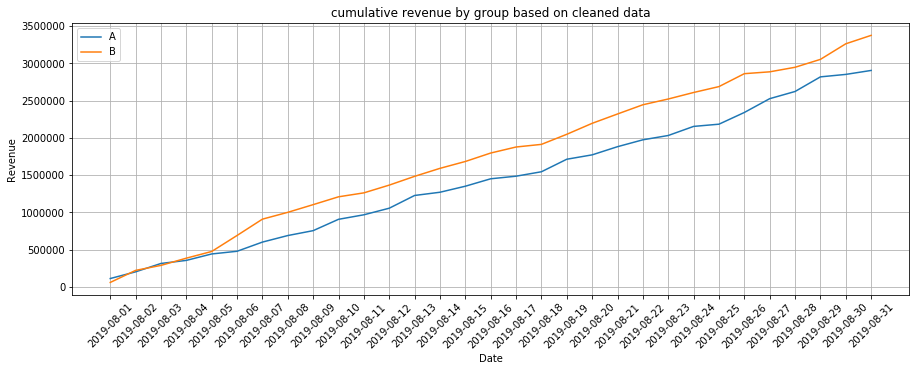

In [51]:
plt.figure(figsize=(15,5))
plt.xticks(rotation=45)
plt.plot(groupA_revenues_clean['date'], groupA_revenues_clean['cumsum_revenue'], label='A')
plt.plot(groupB_revenues_clean['date'], groupB_revenues_clean['cumsum_revenue'], label='B')
plt.grid()
plt.ylabel('Revenue')
plt.xlabel('Date')
plt.legend()
plt.title('cumulative revenue by group based on cleaned data')
plt.xticks(ticks=groupB_revenues['date']);

In [52]:
groupA_revenues_clean['cumsum_number_checks'] = np.cumsum(groupA_revenues_clean['transactionId'])
groupB_revenues_clean['cumsum_number_checks'] = np.cumsum(groupB_revenues_clean['transactionId'])

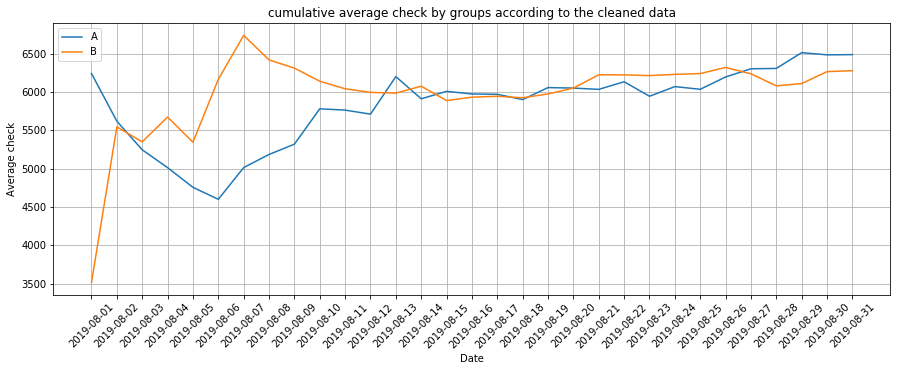

In [53]:
plt.figure(figsize=(15,5))
plt.xticks(rotation=45)
plt.plot(groupA_revenues_clean['date'], groupA_revenues_clean['cumsum_revenue']/groupA_revenues_clean['cumsum_number_checks'], label='A')
plt.plot(groupB_revenues_clean['date'], groupB_revenues_clean['cumsum_revenue']/groupB_revenues_clean['cumsum_number_checks'], label='B')
plt.legend()
plt.grid()
plt.ylabel('Average check')
plt.xlabel('Date')
plt.legend()
plt.title('cumulative average check by groups according to the cleaned data')
plt.xticks(ticks=groupB_revenues['date']);

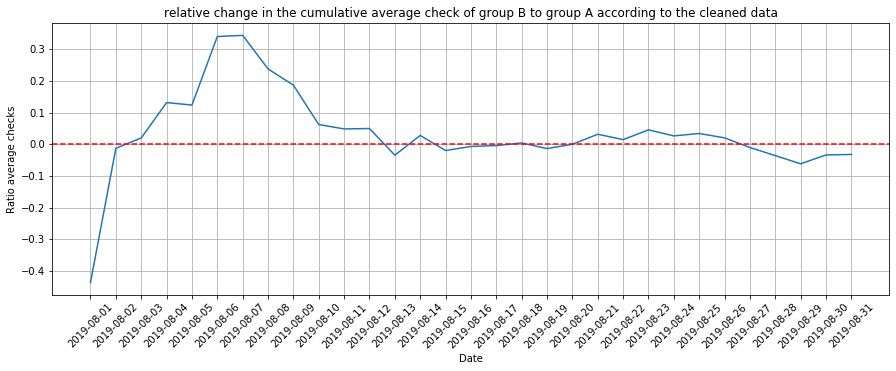

In [54]:
cum_check_clean = groupA_revenues_clean.merge(groupB_revenues_clean, on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(15,5))
plt.xticks(rotation=45)
plt.plot(cum_check_clean['date'], (cum_check_clean['cumsum_revenueB']/cum_check_clean['cumsum_number_checksB'])/(cum_check_clean['cumsum_revenueA']/cum_check_clean['cumsum_number_checksA'])-1)
plt.axhline(y=0, color='red', linestyle='--') 
plt.grid()
plt.ylabel('Ratio average checks')
plt.xlabel('Date')
plt.title('relative change in the cumulative average check of group B to group A according to the cleaned data')
plt.xticks(ticks=groupB_revenues['date']);


### Decision to terminate/continue the test

**By number of orders (conversions):**

cumulative conversion graphs are stable, the statistical significance of the difference in conversions between groups has been proven, the number of checks in group B according to the cleaned data is 19% more than group A - we stop the test, fixing the victory of group B

**Average bill:**

after building visualizations on the cleaned data, we see that the graphs of the cumulative average check are stable, while the relative change in the cumulative average check of group B to group A according to the cleaned data fluctuates around 0, starting from the middle of the test. the statistical significance of the difference in average bills has not been proven - we stop the test, fixing the absence of differences in the average bill between groups

## Conclusion

1. When prioritizing hypotheses, the result depends on which framework is selected. A more comprehensive approach is provided by the RICE framework, since it takes into account the reach of the audience, and not just the impact on customers and confidence in a positive result. According to this framework, the leading hypothesis is to add a subscription form to all main pages in order to collect a customer base for email newsletters.
2. Found buyers who, during testing, moved from group to group in the amount of 5.7% of all customers who made an order - these records were deleted
3. We found outliers in the order amount data, which is the 99th percentile or more than 53904, and also in the number of orders per user, more than 2
4. The statistical significance of differences in the number of checks between groups was proved both for dirty and cleaned data, while the average number of orders in group B was 19% more (according to cleaned data). We see a similar picture when visualizing graphs of cumulative conversion values
5. The existence of a difference in the average check for groups has not been proven - moreover, the average check of group B is lower than the average check of group A by 3%
6. The cumulative graphs show that group B's revenue is almost always higher than group A's revenue - due to more orders, not a higher average check
6. We stop the test by fixing the victory in conversion for group B and no difference in the average check between groups